In [ ]:
pip install opencv-python numpy

In [ ]:
!pip uninstall tensorflow keras pixellib -y

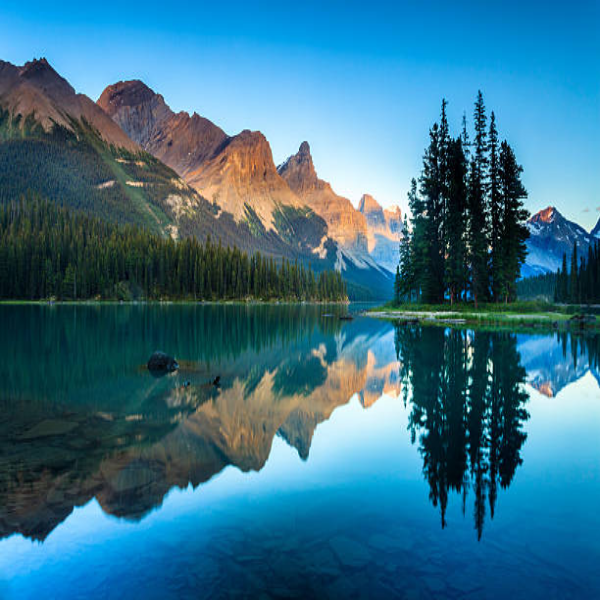

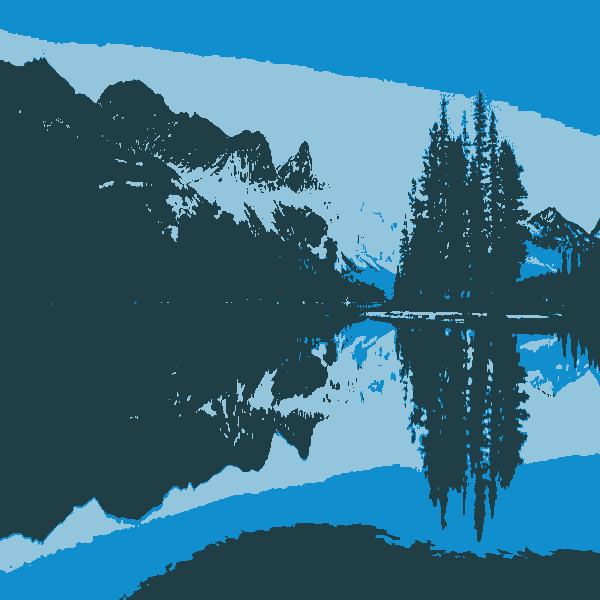

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load the image
image = cv2.imread("image.jpg")  # Replace with your image path

# Check if the image is loaded correctly
if image is None:
    print("Error: Image not found!")
else:
    # Resize the image for faster processing
    image = cv2.resize(image, (600, 600))  # Resize to a smaller size

    # Convert to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Reshape the image to a 2D array of pixels
    pixels = image.reshape((-1, 3))
    pixels = np.float32(pixels)

    # Define the number of clusters (segments)
    k = 3  # Try using fewer clusters

    # Apply K-Means clustering
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.2)  # 10 iterations
    _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert centers back to integer values
    centers = np.uint8(centers)

    # Map labels to cluster centers
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)

    # Display the original and segmented images in Colab
    cv2_imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))  # Original Image
    cv2_imshow(cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR))  # Segmented Image
    cv2.waitKey(0)
    cv2.destroyAllWindows()